# Case Study: Analyzing Transaction and Demographic Data

## Introduction

This case study involves analyzing transaction data from the financial application PhonePe along 
with demographic data across various states and districts in India. 
             The objective is to provide insights into transaction trends, device usage, and demographic correlations, 
while ensuring data consistency and performing advanced analyses to uncover deeper insights.

The datasets span multiple years and quarters, providing a comprehensive view of transactions, user behavior, and demographic details.
Participants are expected to use their Python skills to load, explore, and analyze the data, ultimately deriving meaningful insights and visualizations.


In [58]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Data Loading and Understanding

In [61]:
# Task 1.1 : Load the datasets

state_txn_and_users_file_path = 'phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx'
all_sheets = pd.read_excel(state_txn_and_users_file_path,
                sheet_name=['State_Txn and Users','State_TxnSplit','State_DeviceData','District_Txn and Users','District Demographics'])

state_txn_and_users = all_sheets['State_Txn and Users']   
state_txn_split =  all_sheets['State_TxnSplit']
state_device_data = all_sheets['State_DeviceData']
district_txn_and_users = all_sheets['District_Txn and Users']
district_demographics = all_sheets['District Demographics']

# Task : Display the required rows and structures

# 1. State_Txn and Users dataset First 5 records
print("Task 1 : First 5 rows of State_Txn dataset:")
print(state_txn_and_users.head())


# 2. State_TxnSplit dataset Bottom 10 rows
print("\n Task 2 : Bottom 10 rows of State_TxnSplit dataset:")
print(state_txn_split.tail(10))


# 3. State_DeviceData dataset 10 middle rows
mid_index = len(state_device_data) // 2
print("\n Task 3 : 10 rows from the middle of State_DeviceData dataset:")
print(state_device_data.iloc[mid_index-5:mid_index+5])


# 4. District_Txn and Users dataset first 10 rows and  Last 10 rows
print("\n Task 4 : First 10 rows of District_Txn dataset:")
print(district_txn_and_users.head(10))

print("\n Task 4 : Last 10 rows of District_Txn dataset:")
print(district_txn_and_users.tail(10))


# 5. District Demographics dataset Every 10th rows
print("\n Task 5 : Every 10th row of District Demographics dataset:")
print(district_demographics.iloc[::10])


Task 1 : First 5 rows of State_Txn dataset:
                       State  Year  Quarter  Transactions  Amount (INR)  \
0  Andaman & Nicobar Islands  2018        1          6658  1.463176e+07   
1  Andaman & Nicobar Islands  2018        2         11340  2.833854e+07   
2  Andaman & Nicobar Islands  2018        3         16265  5.555747e+07   
3  Andaman & Nicobar Islands  2018        4         23758  9.054834e+07   
4  Andaman & Nicobar Islands  2019        1         30486  1.022997e+08   

     ATV (INR)  Registered Users  App Opens  
0  2197.621091              6740          0  
1  2498.989022              9405          0  
2  3415.768284             12149          0  
3  3811.277720             15222          0  
4  3355.630147             18596          0  

 Task 2 : Bottom 10 rows of State_TxnSplit dataset:
            State  Year  Quarter          Transaction Type  Transactions  \
2504  West Bengal  2021        1     Peer-to-peer payments      53869075   
2505  West Bengal  2021 

In [62]:
# Task 1.2 : Summary statistics for numerical columns

# Load the Excel file with multiple sheets
file_path = 'phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx'
sheet_names = ['State_Txn and Users', 'State_TxnSplit', 'State_DeviceData', 'District_Txn and Users', 'District Demographics']

# Load all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(file_path, sheet_name=sheet_names)



# 1 :  Display statistics and data types for each dataset
def display_statistics_and_types(sheet_data, sheet_name):
    print(f"\nSummary statistics for {sheet_name} dataset:")
    print(sheet_data.describe())  # Summary statistics for numerical columns
    
    print(f"\nData types of columns in {sheet_name} dataset:")
    print(sheet_data.dtypes)

# 2 :  Loop through each sheet to perform operations
for sheet_name, sheet_data in all_sheets.items():

    # Display summary statistics and data types
    display_statistics_and_types(sheet_data, sheet_name)




Summary statistics for State_Txn and Users dataset:
              Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.9305

In [65]:
# Task 1.3 : Check for missing values

# Function to analyze missing values
def check_missing_values(sheet_data, sheet_name):
    print(f"\nMissing Values Analysis for {sheet_name} dataset:")

    # 1. Identify missing values
    missing_counts = sheet_data.isnull().sum()
    
    # 2. Calculate the percentage of missing values for each column
    total_rows = len(sheet_data)
    missing_percentages = (missing_counts / total_rows) * 100
    
    # Filter columns with missing values
    missing_data = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percentages
    })
    missing_data = missing_data[missing_data['Missing Count'] > 0]

    # Display missing values summary
    if missing_data.empty:
        print("No missing values found.")
    else:
        print(missing_data)
        
        # 3. Highlight the column with the highest percentage of missing values
        max_missing_column = missing_data['Missing Percentage'].idxmax()
        max_missing_percentage = missing_data.loc[max_missing_column, 'Missing Percentage']
        print(f"\nColumn with the highest percentage of missing values: '{max_missing_column}' ({max_missing_percentage:.2f}%)")

# Loop through each dataset and perform missing value analysis
for sheet_name, sheet_data in all_sheets.items():
    check_missing_values(sheet_data, sheet_name)



Missing Values Analysis for State_Txn and Users dataset:
              Missing Count  Missing Percentage
Amount (INR)              1            0.198413

Column with the highest percentage of missing values: 'Amount (INR)' (0.20%)

Missing Values Analysis for State_TxnSplit dataset:
No missing values found.

Missing Values Analysis for State_DeviceData dataset:
No missing values found.

Missing Values Analysis for District_Txn and Users dataset:
           Missing Count  Missing Percentage
Code                  28            0.273224
ATV (INR)              4            0.039032

Column with the highest percentage of missing values: 'Code' (0.27%)

Missing Values Analysis for District Demographics dataset:
No missing values found.


In [67]:
# Handling Missing Values

In [69]:
# Task 1.4 : Create a summary

# 1.	Calculate the total number of states and the total number of districts.
Total_States = district_demographics['State'].nunique()
print(f"Total Number of States : {Total_States}")

Total_District = district_demographics['District'].nunique()
print(f"Total Number of States : {Total_District}")

# 2.	Identify the state with the highest number of districts.
district_count_by_state = district_demographics['State'].value_counts()
state_with_max_districts = district_count_by_state.idxmax()
max_district_count = district_count_by_state.max()
print(f"State with the Highest Number of Districts: {state_with_max_districts}")
print(f"Number of Districts in {state_with_max_districts}: {max_district_count}")



Total Number of States : 36
Total Number of States : 736
State with the Highest Number of Districts: Uttar Pradesh
Number of Districts in Uttar Pradesh: 75


## Task 2: Exploratory Data Analysis (EDA)

In [72]:
# Task 2.1: Analyze transaction trends over the years for each state

# 1. Calculating the total number of transactions and total transaction amount for each state over the years. 
summary_data = state_txn_and_users.groupby(['State','Year']).agg(
    Total_Transactions = ('Transactions','sum'),
    Total_Amount = ('Amount (INR)','sum')).reset_index()
pivot_data = summary_data.pivot(index = 'State',columns = 'Year',values = (['Total_Transactions','Total_Amount']))
print('Summary Data of all States with thier Transactions and Amount')
pivot_data


Summary Data of all States with thier Transactions and Amount


Total_Transactions               \
Year                                               2018         2019   
State                                                                  
Andaman & Nicobar Islands                       58021.0     133104.0   
Andhra Pradesh                               77779112.0  297180254.0   
Arunachal Pradesh                              435229.0    1314871.0   
Assam                                         8806777.0   22691015.0   
Bihar                                        44556885.0  131986927.0   
Chandigarh                                    2383031.0    5884404.0   
Chhattisgarh                                 13933118.0   45826483.0   
Dadra & Nagar Haveli and Daman & Diu          1044832.0    2559192.0   
Delhi                                        64231244.0  254461712.0   
Goa                                           1244738.0    4114941.0   
Gujarat                                      39761960.0  134749574.0   
Haryana                                      31843908.0  113047107.0   
Himachal Pradesh                              3364250.0   10922850.0   
Jammu & Kashmir                               7763165.0    7487796.0   
Jharkhand                                    19737665.0   51985184.0   
Karnataka                                    99925678.0  610519200.0   
Kerala                                       11524547.0   35537598.0   
Ladakh                                          81174.0     292019.0   
Lakshadweep                                      6255.0      12276.0   
Madhya Pradesh                               57111347.0  199889462.0   
Maharashtra                                 116301535.0  526225123.0   
Manipur                                        661158.0    1317186.0   
Meghalaya                                      388850.0    1113558.0   
Mizoram                                        140170.0     369310.0   
Nagaland                                       342148.0     936380.0   
Odisha                                       65162918.0  169961871.0   
Puducherry                                     732708.0    2810650.0   
Punjab                                       12800841.0   40087404.0   
Rajasthan                                    52782208.0  246343185.0   
Sikkim                                         381689.0    1948037.0   
Tamil Nadu                                   54950272.0  162453376.0   
Telangana                                    67541293.0  439968715.0   
Tripura                                       1188478.0    2627025.0   
Uttar Pradesh                                92864871.0  271736968.0   
Uttarakhand                                   8358700.0   23431868.0   
West Bengal                                 120011635.0  257900590.0   

                                                                  \
Year                                          2020          2021   
State                                                              
Andaman & Nicobar Islands             4.462740e+05  5.861660e+05   
Andhra Pradesh                        7.636167e+08  6.425151e+08   
Arunachal Pradesh                     3.547905e+06  2.745794e+06   
Assam                                 4.713522e+07  4.494496e+07   
Bihar                                 2.665640e+08  2.705361e+08   
Chandigarh                            8.861323e+06  8.387784e+06   
Chhattisgarh                          9.802309e+07  8.412586e+07   
Dadra & Nagar Haveli and Daman & Diu  4.807834e+06  4.050327e+06   
Delhi                                 3.648219e+08  3.275163e+08   
Goa                                   9.080241e+06  1.004168e+07   
Gujarat                               2.318653e+08  2.066160e+08   
Haryana                               2.269268e+08  1.959336e+08   
Himachal Pradesh                      2.160241e+07  1.709793e+07   
Jammu & Kashmir                       1.277698e+07  1.702539e+07   
Jharkhand                             1.049243e+08  9.862381e+07   
Karn

In [74]:
# 2. Identify the top 5 states with the highest transaction volumes and the top 5 states with the lowest transaction volumes.

state_totals = state_txn_and_users.groupby('State').agg(
    Total_Transactions=('Transactions', 'sum')
).reset_index()

# Sort by transaction volume
state_totals_sorted = state_totals.sort_values(by='Total_Transactions', ascending=False)

# Top 5 states with the highest transaction volumes
top_5_states_high = state_totals_sorted.head(5)
print("\nTop 5 States with the Highest Transaction Volumes:")
print(top_5_states_high)

# Top 5 states with the lowest transaction volumes
top_5_states_low = state_totals_sorted.tail(5)
print("\nTop 5 States with the Lowest Transaction Volumes:")
print(top_5_states_low)


Top 5 States with the Highest Transaction Volumes:
             State  Total_Transactions
15       Karnataka          2981044533
20     Maharashtra          2833670154
31       Telangana          2347430243
1   Andhra Pradesh          1781091169
28       Rajasthan          1382918930

Top 5 States with the Lowest Transaction Volumes:
                        State  Total_Transactions
22                  Meghalaya             5648913
23                    Mizoram             2162776
17                     Ladakh             1880109
0   Andaman & Nicobar Islands             1223565
18                Lakshadweep               71610


In [76]:
# Task 2.2 : Identify the most common transaction types in each state and quarter
# 1. For each state and quarter, determine the most frequent transaction type. Display the results in a tabular format.
 
#  Group by State, Quarter, and Transaction Type
grouped_data = state_txn_split.groupby(['State', 'Quarter', 'Transaction Type'])['Transactions'].sum().reset_index()

#  the most frequent transaction type for each State and Quarter
most_common_txn = grouped_data.loc[grouped_data.groupby(['State', 'Quarter'])['Transactions'].idxmax()]

#  Display the results in a tabular format
most_common_txn = most_common_txn[['State', 'Quarter', 'Transaction Type', 'Transactions']]

# Display the table
most_common_txn


,State,Quarter,Transaction Type,Transactions
3,Andaman & Nicobar Islands,1,Peer-to-peer payments,138772
9,Andaman & Nicobar Islands,2,Recharge & bill payments,180447
14,Andaman & Nicobar Islands,3,Recharge & bill payments,84165
18,Andaman & Nicobar Islands,4,Peer-to-peer payments,110018
23,Andhra Pradesh,1,Peer-to-peer payments,255236515
...,...,...,...,...
698,Uttarakhand,4,Peer-to-peer payments,11515030
703,West Bengal,1,Peer-to-peer payments,114083760
708,West Bengal,2,Peer-to-peer payments,118087640
713,West Bengal,3,Peer-to-peer payments,100961691


In [78]:
# Task 2.3 : Determine the device brand with the highest number of registered users in each state
# 1. Device brand with the highest number of registered users in each state.
Devices = state_device_data.groupby('Brand').agg(Number_of_registered_Users=('Registered Users','sum'))
Top_Devices = Devices.sort_values('Number_of_registered_Users',ascending=False)
print('Top 5 Devices with Registered Users')
Top_Devices.head(5)

Top 5 Devices with Registered Users


,Number_of_registered_Users
Brand,
Xiaomi,615566524
Samsung,480799591
Vivo,411369522
Oppo,283522909
Others,211221642


States wuth their Highest Populated Districts
           State           District  Population
691  West Bengal  North 24 Parganas    10082852
235    Karnataka    Bangalore Urban     9588910
356  Maharashtra               Pune     9426959
348  Maharashtra    Mumbai suburban     9332481
695  West Bengal  South 24 Parganas     8161961
363  Maharashtra              Thane     8070032
140      Gujarat          Ahmedabad     7208200
509   Tamil Nadu            Chennai     7139882
689  West Bengal        Murshidabad     7102430
489    Rajasthan             Jaipur     6663971


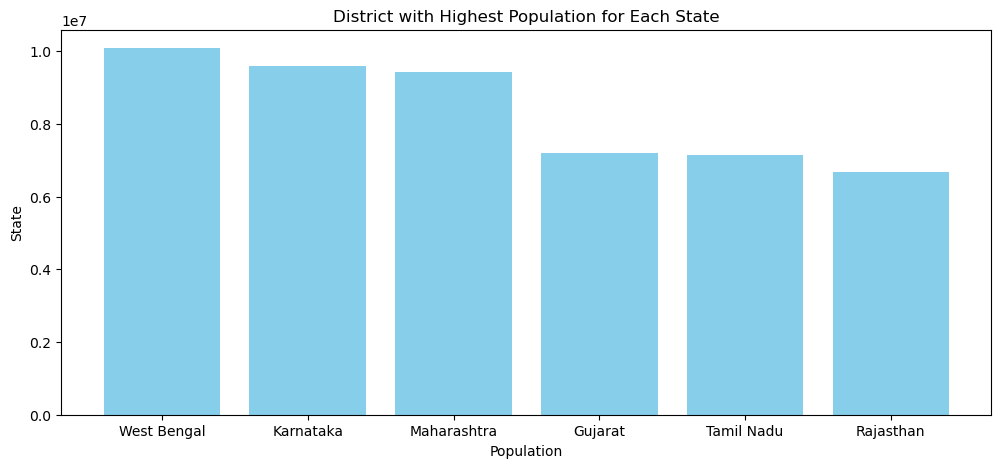

In [80]:
# Task 2.4: Create a list of the top district per state based on population
# 1.For each state, identify the district with the highest population. Display the results in a tabular format.
# 2.Create a column chart depicting the district with the highest population for each state.

# Creating list of the top district per state based on population
district_per_state = district_demographics.sort_values(by='Population', ascending=False)

# Getting Populated States
top_district_per_state = district_per_state[['State','District','Population']].head(10)

# printing data
print('States wuth their Highest Populated Districts')
print(top_district_per_state)

# Showing Data with Chart
plt.figure(figsize=(12, 5))
plt.bar(top_district_per_state['State'], top_district_per_state['Population'], color='skyblue')
plt.xlabel('Population')
plt.ylabel('State')
plt.title('District with Highest Population for Each State')
plt.show()

In [82]:
# Task 2.5: Calculate the average transaction value (ATV) for each state
# 1. Computing the average transaction value for each state. 
# 2. Identifying the top 5 states with the highest ATV and the top 5 states with the lowest ATV. 

# Getting the States grouping with thier Average Transaction Value
Average_Transaction_Value_of_States = state_txn_and_users.groupby('State').agg(Average_transaction_value = ('ATV (INR)','mean'))
print('States grouping with thier Average Transaction Amount')
print(Average_Transaction_Value_of_States)

# Now getting Top 5 States and Bottom 5 States with thier Average Transaction Value
Top_5 = Average_Transaction_Value_of_States.sort_values('Average_transaction_value',ascending = False)
print('Top 5 States with Average Transaction Amount')
print(Top_5.head(5))

Bottom_5 = Average_Transaction_Value_of_States.sort_values('Average_transaction_value',ascending = True)
print('Bottom 5 States with Average Transaction Amount')
print(Bottom_5.head(5))

States grouping with thier Average Transaction Amount
                                      Average_transaction_value
State                                                          
Andaman & Nicobar Islands                           3159.266422
Andhra Pradesh                                      1748.091476
Arunachal Pradesh                                   2638.323985
Assam                                               2008.495656
Bihar                                               2023.316978
Chandigarh                                          2113.797075
Chhattisgarh                                        1650.818617
Dadra & Nagar Haveli and Daman & Diu                1487.395599
Delhi                                               1589.839307
Goa                                                 1895.258549
Gujarat                                             1696.101220
Haryana                                             1831.840325
Himachal Pradesh                                  

In [84]:
# Task 2.6: Analyze app usage trends
# Calculating the total number of app opens over the years and quarters for each state.
# Identifying trends in app usage by creating a line plot showing the number of app opens over time for a selected state.
 
App_Trends = state_txn_and_users.groupby(['State','Year','Quarter']).agg(Total_App_Opens = ('App Opens','sum') ).reset_index()
Data_summary_app_open = App_Trends.pivot(index = 'State',columns = ['Year','Quarter'],values = 'Total_App_Opens')
print('Total number of app opens over the years and quarters for each state')
Data_summary_app_open

Total number of app opens over the years and quarters for each state


Year                                 2018          2019                        \
Quarter                                 1  2  3  4    1          2          3   
State                                                                           
Andaman & Nicobar Islands               0  0  0  0    0      52640     171107   
Andhra Pradesh                          0  0  0  0    0   81375251  310953542   
Arunachal Pradesh                       0  0  0  0    0     502873    1811700   
Assam                                   0  0  0  0    0    7350326   25393673   
Bihar                                   0  0  0  0    0   39607022  126521298   
Chandigarh                              0  0  0  0    0    1220176    4625196   
Chhattisgarh                            0  0  0  0    0   13206373   46362341   
Dadra & Nagar Haveli and Daman & Diu    0  0  0  0    0     860686    3126189   
Delhi                                   0  0  0  0    0   43731570  163381027   
Goa                                     0  0  0  0    0    1352232    4753892   
Gujarat                                 0  0  0  0    0   34890301  129441484   
Haryana                                 0  0  0  0    0   31929195  118332587   
Himachal Pradesh                        0  0  0  0    0    3321711   10720741   
Jammu & Kashmir                         0  0  0  0    0    2705373    3843919   
Jharkhand                               0  0  0  0    0   14929066   55504460   
Karnataka                               0  0  0  0    0  113024811  445683660   
Kerala                                  0  0  0  0    0    8673220   31471694   
Ladakh                                  0  0  0  0    0     157317     503126   
Lakshadweep                             0  0  0  0    0       4580      15038   
Madhya Pradesh                          0  0  0  0    0   50642151  192353380   
Maharashtra                             0  0  0  0    0  109967705  439998413   
Manipur                                 0  0  0  0    0     464829    1594205   
Meghalaya                               0  0  0  0    0     395764    1387814   
Mizoram                                 0  0  0  0    0     133025     457834   
Nagaland                                0  0  0  0    0     362497    1244022   
Odisha                                  0  0  0  0    0   33955545  130181456   
Puducherry                              0  0  0  0    0     661932    2476922   
Punjab                                  0  0  0  0    0   10928094   40860886   
Rajasthan                               0  0  0  0    0   62787336  238338999   
Sikkim                                  0  0  0  0    0     398520    1316804   
Tamil Nadu                              0  0  0  0    0   33658961  124690342   
Telangana                               0  0  0  0    0   80842302  318124511   
Tripura                                 0  0  0  0    0     953627    3350991   
Uttar Pradesh                           0  0  0  0    0   78394040  268142606   
Uttarakhand                             0  0  0  0    0    7454279   24660988   
West Bengal                             0  0  0  0    0   49514201  176559011   

Year                                                  2020             \
Quarter                                       4          1          2   
State                                                                   
Andaman & Nicobar Islands                177012     193586     305072   
Andhra Pradesh                        411201518  486513773  494341698   
Arunachal Pradesh                       2140340    2598321    3387006   
Assam                                  26599449   33097892   39304924   
Bihar                                 163998097  183868505  218435035   
Chandigarh                              4960441    5201211    3451250   
Chhattisgarh                           57278977   64224101   68493384   
Dadra & Nagar Haveli and Daman & Diu    3770543    4195122    4505127   
Delhi                                

C:\Users\Parag\AppData\Local\Temp\ipykernel_9188\1953853009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  State_Delhi['Year_Quarter'] = State_Delhi['Year'].astype(str) + " Q" + State_Delhi['Quarter'].astype(str)


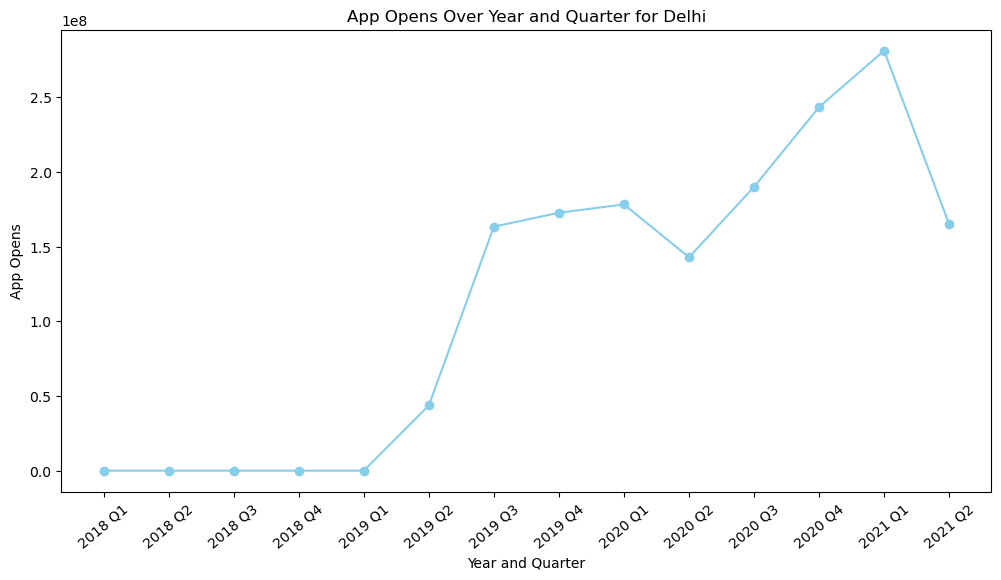

In [86]:
# Identifying trends in app usage by creating a line plot showing the number of app opens over time for a selected state.

state_txn_and_users.columns
# Filtering the data for Delhi
State_Delhi = state_txn_and_users[state_txn_and_users['State'] == 'Delhi']

# Creating a new column combining Year and Quarter
State_Delhi['Year_Quarter'] = State_Delhi['Year'].astype(str) + " Q" + State_Delhi['Quarter'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(State_Delhi['Year_Quarter'], State_Delhi['App Opens'], color='skyblue', marker='o')

# Adding labels and title
plt.xlabel('Year and Quarter')
plt.ylabel('App Opens')
plt.title('App Opens Over Year and Quarter for Delhi')

# Rotate x-axis labels for better readability
plt.xticks(rotation=40)

# Display the chart
plt.show()


The most_recent_quarter is : 4


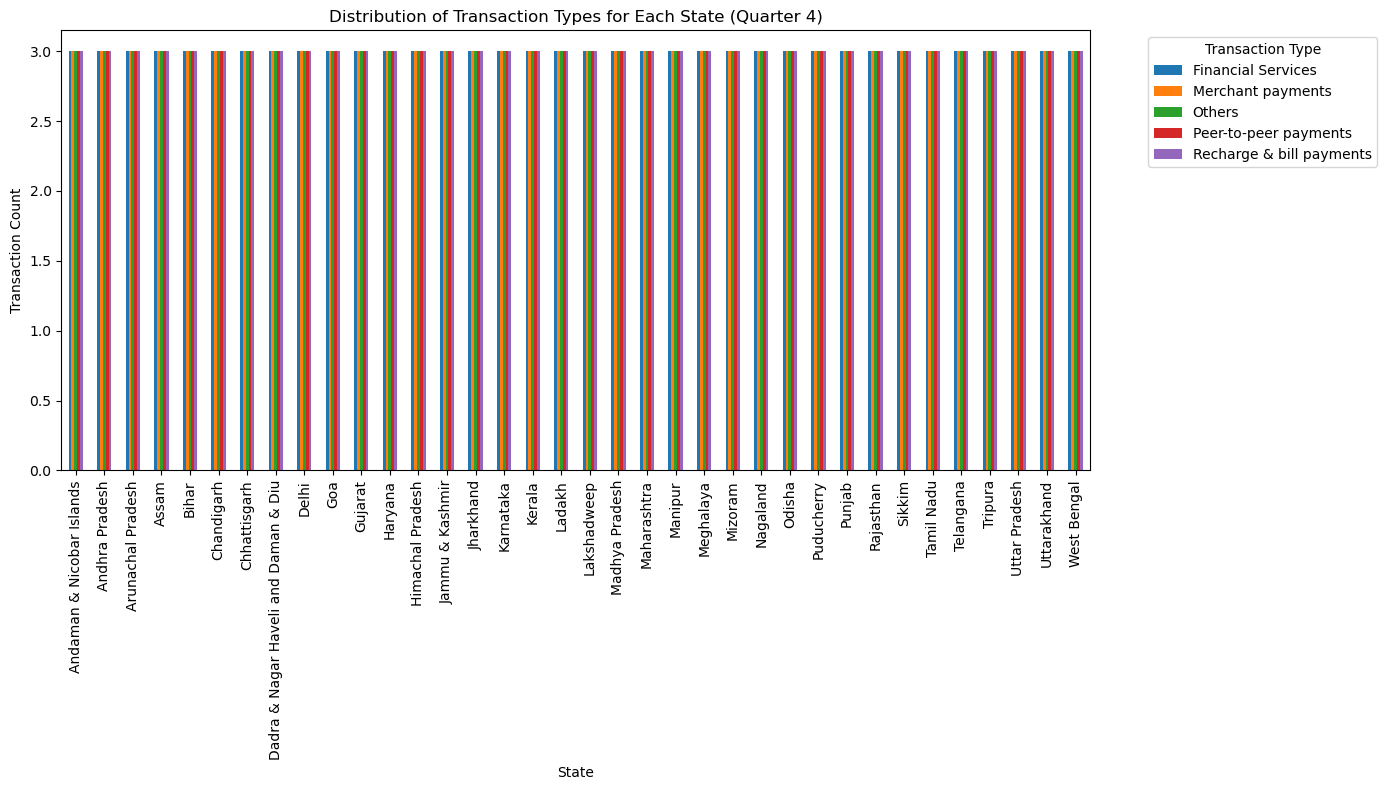

In [87]:
# Task 2.7: Distribution of transaction types
# Creating a bar chart showing the distribution of different transaction types for each state for the most recent quarter in the dataset.

# finding the most recent quarter
most_recent_quarter = state_txn_split['Quarter'].max()
print('The most_recent_quarter is :',most_recent_quarter)

# Filtering Rxn Split data for the most recent quarter
recent_quarter_data = state_txn_split[state_txn_split['Quarter'] == most_recent_quarter]

#  Group by 'State' and 'Transaction Type' and count occurrences
transaction_counts = recent_quarter_data.groupby(['State', 'Transaction Type']).size().unstack(fill_value=0)

#  Plot the bar chart
transaction_counts.plot(kind='bar', stacked=False, figsize=(14,8))

# Customize the plot
plt.title(f'Distribution of Transaction Types for Each State (Quarter {most_recent_quarter})')
plt.xlabel('State')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [89]:
# Task 2.8: Find unique mapping between district name and district code
# 1. Identify the unique mapping between district names and district codes from the dataset. [hint: you can use drop_duplicates()] 
# 2. Create a CSV file containing the unique district name and district code mappings.
# 3. Export the CSV file.

# Dropping duplicates
unique_district_mapping = district_txn_and_users[['District', 'Code']].drop_duplicates()

#  Create a CSV file containing the unique district name and district code mappings
unique_district_mapping.to_csv('unique_district_mapping.csv', index=False)

# Step 3: Print confirmation message
print("CSV file 'unique_district_mapping.csv' has been successfully created.")

CSV file 'unique_district_mapping.csv' has been successfully created.


## Task 3: Data Quality Checks

In [91]:
# Task 3.1: Ensure data consistency across state and district levels
# 1. For each state, calculate the total number of transactions, total transaction amount,
# and total registered users by summing up the values from the district level data.
# 2. Compare the results with the corresponding values at the state level to ensure they match.
# 3. Display any discrepancies found between the district-level and state-level data.

State_Level_Data = state_txn_and_users.groupby('State').agg(
    Total_Transactions = ('Transactions','sum'),
    Total_Transaction_Amount = ('Amount (INR)','sum'),
    Total_Registered_Users = ('Registered Users','sum'))
State_Level_Data.head(1)

,Total_Transactions,Total_Transaction_Amount,Total_Registered_Users
State,,,
Andaman & Nicobar Islands,1223565,3.641818e+09,408396


In [94]:
District_Level_Data = district_txn_and_users.groupby('State').agg(
    Total_Transactions = ('Transactions','sum'),
    Total_Transaction_Amount = ('Amount (INR)','sum'),
    Total_Registered_Users = ('Registered Users','sum'))
District_Level_Data.head(1)   

,Total_Transactions,Total_Transaction_Amount,Total_Registered_Users
State,,,
Andaman & Nicobar Islands,1223565,3.641818e+09,408396


In [97]:
#  Merging the aggregated district data with state-level data
merged_data = pd.merge(State_Level_Data,District_Level_Data, on='State', how='left')
merged_data

,Total_Transactions_x,Total_Transaction_Amount_x,Total_Registered_Users_x,Total_Transactions_y,Total_Transaction_Amount_y,Total_Registered_Users_y
State,,,,,,
Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396
Andhra Pradesh,1781091169,3.187847e+12,158007957,1781091169,3.860292e+12,158007957
Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214
Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751
Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760
Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466
Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388
Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112
Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654


## Task 4: Data Merging and Advanced Analysis

Displaying Ratio of Users to population by State
                         State  Registered Users  Population  \
0    Andaman & Nicobar Islands              6740      380581   
1    Andaman & Nicobar Islands              9405      380581   
2    Andaman & Nicobar Islands             12149      380581   
3    Andaman & Nicobar Islands             15222      380581   
4    Andaman & Nicobar Islands             18596      380581   
..                         ...               ...         ...   
499                West Bengal          13222022    92828987   
500                West Bengal          14448366    92828987   
501                West Bengal          15662093    92828987   
502                West Bengal          16808799    92828987   
503                West Bengal          17979979    92828987   

     User-to-Population Ratio  
0                    1.770976  
1                    2.471222  
2                    3.192225  
3                    3.999674  
4                    4

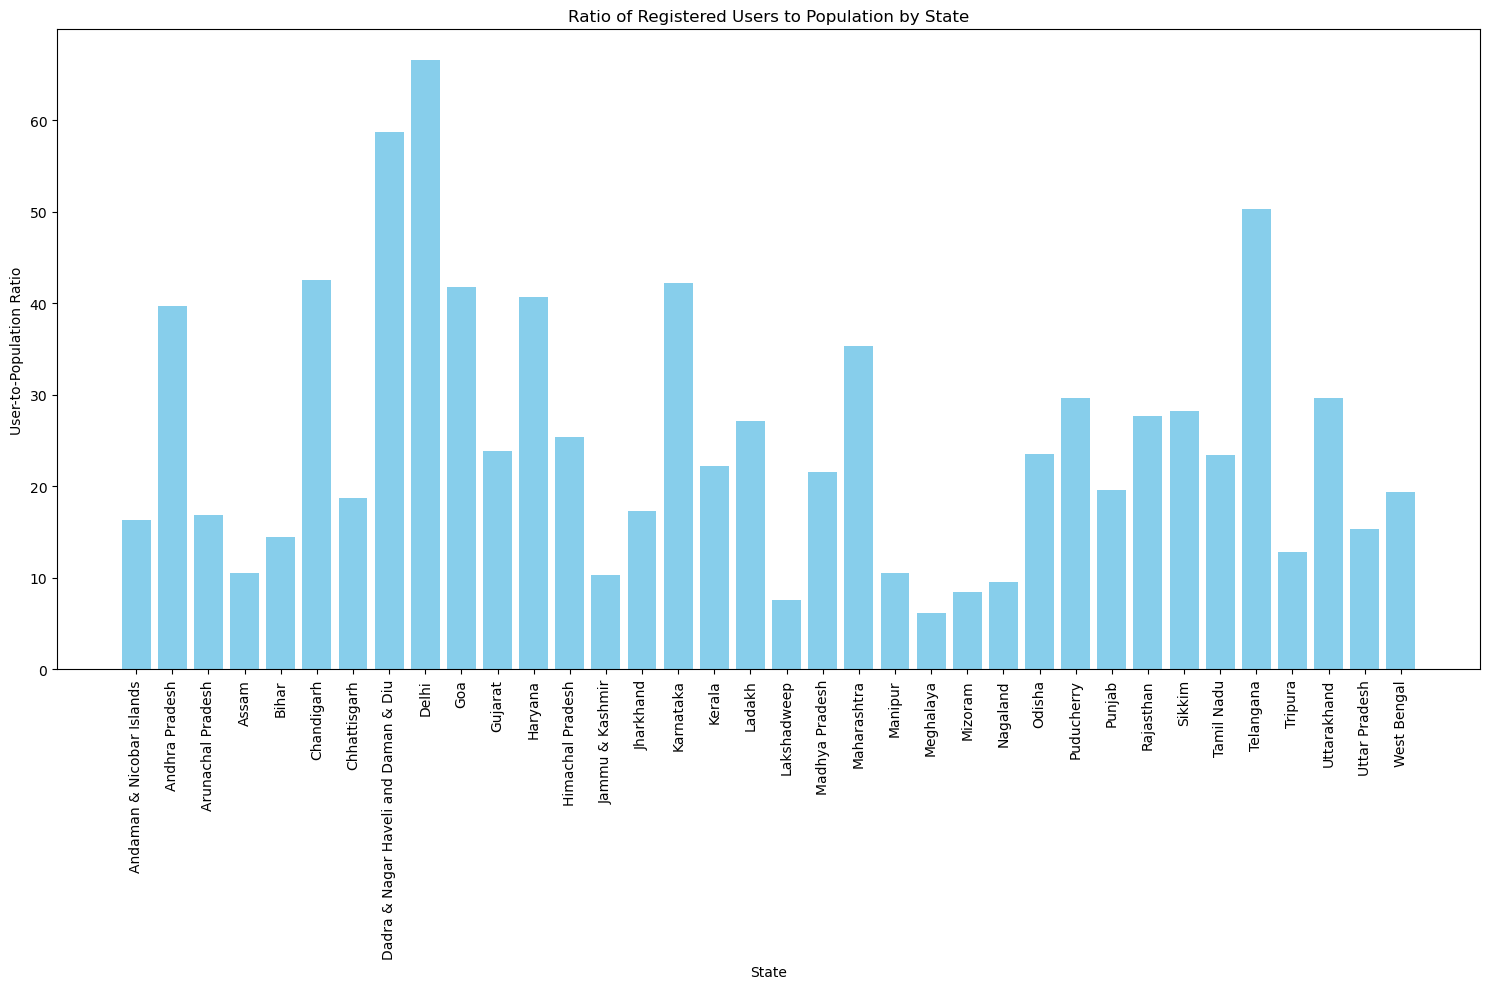

In [103]:
# 4.1: Ratio of users to population by state
# 1. Merge the State_Txn and Users dataset with the District Demographics dataset 
# to calculate the ratio of registered users to the population for each state. Display the results in a tabular format.
# 2 . Create a column chart depicting the ratio of users to population by state.

# Group district demographics by state to get the total population for each state
state_population =  district_demographics.groupby('State', as_index=False)['Population'].sum()

# Merge the State_Txn and Users dataset with state_population
merged_data = pd.merge(state_txn_and_users, state_population, on='State', how='inner')

# Calculate the ratio of registered users to population
merged_data['User-to-Population Ratio'] = merged_data['Registered Users'] / merged_data['Population']*100

# Display the results in a tabular format
print('Displaying Ratio of Users to population by State')
print(merged_data[['State','Registered Users','Population', 'User-to-Population Ratio']])

#  column chart for the ratio of users to population by state
print('Column Chart with ratio of users to population by state')
plt.figure(figsize=(15,10))
plt.bar(merged_data['State'], merged_data['User-to-Population Ratio'], color='skyblue')
plt.xlabel('State')
plt.ylabel('User-to-Population Ratio')
plt.title('Ratio of Registered Users to Population by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Correlation between population density and transaction volume: 0.19038897306782118


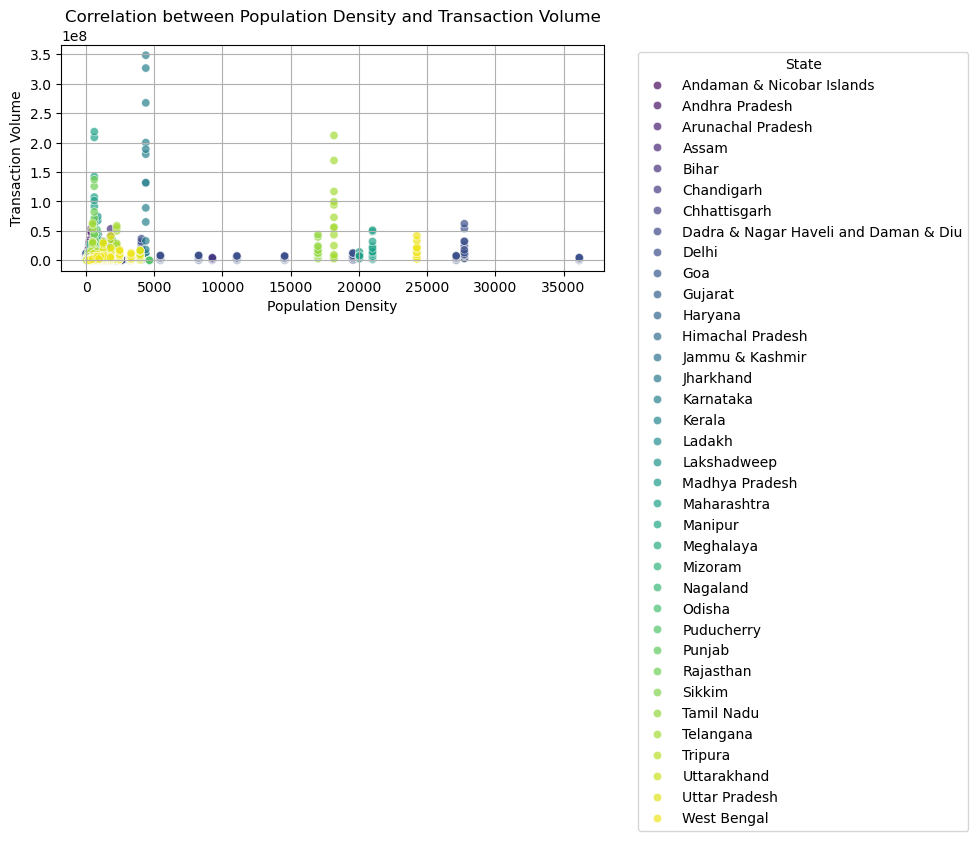

In [104]:

# Task 4.2: Correlate population density with transaction volume
# 1. Merge the District_Txn and Users dataset with the District Demographics dataset.
# 2. Calculate the correlation between population density and transaction volume.
# 3. Create a scatter plot to visualize the correlation between population density and transaction volume.


# Merging the datasets on the common columns (e.g., 'State' and 'Code')
merged_data = pd.merge(district_txn_and_users, district_demographics, on=['State', 'Code'])

# Calculating the correlation between population density and transaction volume
correlation = merged_data['Density'].corr(merged_data['Transactions'])
print(f"Correlation between population density and transaction volume: {correlation}")

#  Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Density', y='Transactions', hue='State', palette='viridis', alpha=0.7)
plt.title('Correlation between Population Density and Transaction Volume')
plt.xlabel('Population Density')
plt.ylabel('Transaction Volume')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State')
plt.tight_layout()
plt.show()



In [105]:
# Task 4.3: Average transaction amount per user
# Merge relevant datasets to calculate the average transaction amount per user for each state. 
# Identify the top 5 states with the highest average transaction amount per user and 
# the top 5 states with the lowest average transaction amount per user. 

# Calculate the Average Transaction Amount Per User (ATAPU) for each state
# ATAPU = Total Amount (INR) / Registered Users

# Grouping the state-level data
state_avg_txn = state_txn_and_users.groupby('State', as_index=False).agg({
    'Amount (INR)': 'sum',
    'Registered Users': 'sum'
})

# Calculating Average Transaction Amount Per User
state_avg_txn['Avg_Amount_Per_User'] = state_avg_txn['Amount (INR)'] / state_avg_txn['Registered Users']

# Sorting to find the top 5 states with the highest and lowest ATAPU
top_5_highest = state_avg_txn.nlargest(5, 'Avg_Amount_Per_User')[['State', 'Avg_Amount_Per_User']]
top_5_lowest = state_avg_txn.nsmallest(5, 'Avg_Amount_Per_User')[['State', 'Avg_Amount_Per_User']]

# Displaying results
print("Average Transaction Amount Per User for Each State:")
print(state_avg_txn[['State', 'Avg_Amount_Per_User']])

print("\nTop 5 States with Highest Average Transaction Amount Per User:")
print(top_5_highest)

print("\nTop 5 States with Lowest Average Transaction Amount Per User:")
print(top_5_lowest)

Average Transaction Amount Per User for Each State:
                                   State  Avg_Amount_Per_User
0              Andaman & Nicobar Islands          8917.369075
1                         Andhra Pradesh         20175.233763
2                      Arunachal Pradesh         11949.126662
3                                  Assam         10476.576498
4                                  Bihar         14221.991933
5                             Chandigarh         14129.308175
6                           Chhattisgarh         11098.884128
7   Dadra & Nagar Haveli and Daman & Diu          6907.815954
8                                  Delhi         17299.587909
9                                    Goa          9309.966756
10                               Gujarat          8746.070597
11                               Haryana         12386.401889
12                      Himachal Pradesh          7317.601442
13                       Jammu & Kashmir         11222.890558
14                

                          State  Year  Quarter   Brand  Usage Ratio
6     Andaman & Nicobar Islands  2018        1   Apple     0.033976
18    Andaman & Nicobar Islands  2018        2   Apple     0.032749
29    Andaman & Nicobar Islands  2018        3   Apple     0.030537
40    Andaman & Nicobar Islands  2018        4   Apple     0.029891
51    Andaman & Nicobar Islands  2019        1   Apple     0.027694
...                         ...   ...      ...     ...          ...
5489                West Bengal  2020        2  Xiaomi     0.265486
5500                West Bengal  2020        3  Xiaomi     0.262483
5511                West Bengal  2020        4  Xiaomi     0.259885
5522                West Bengal  2021        1  Xiaomi     0.259211
5533                West Bengal  2021        2  Xiaomi     0.258886

[5544 rows x 5 columns]


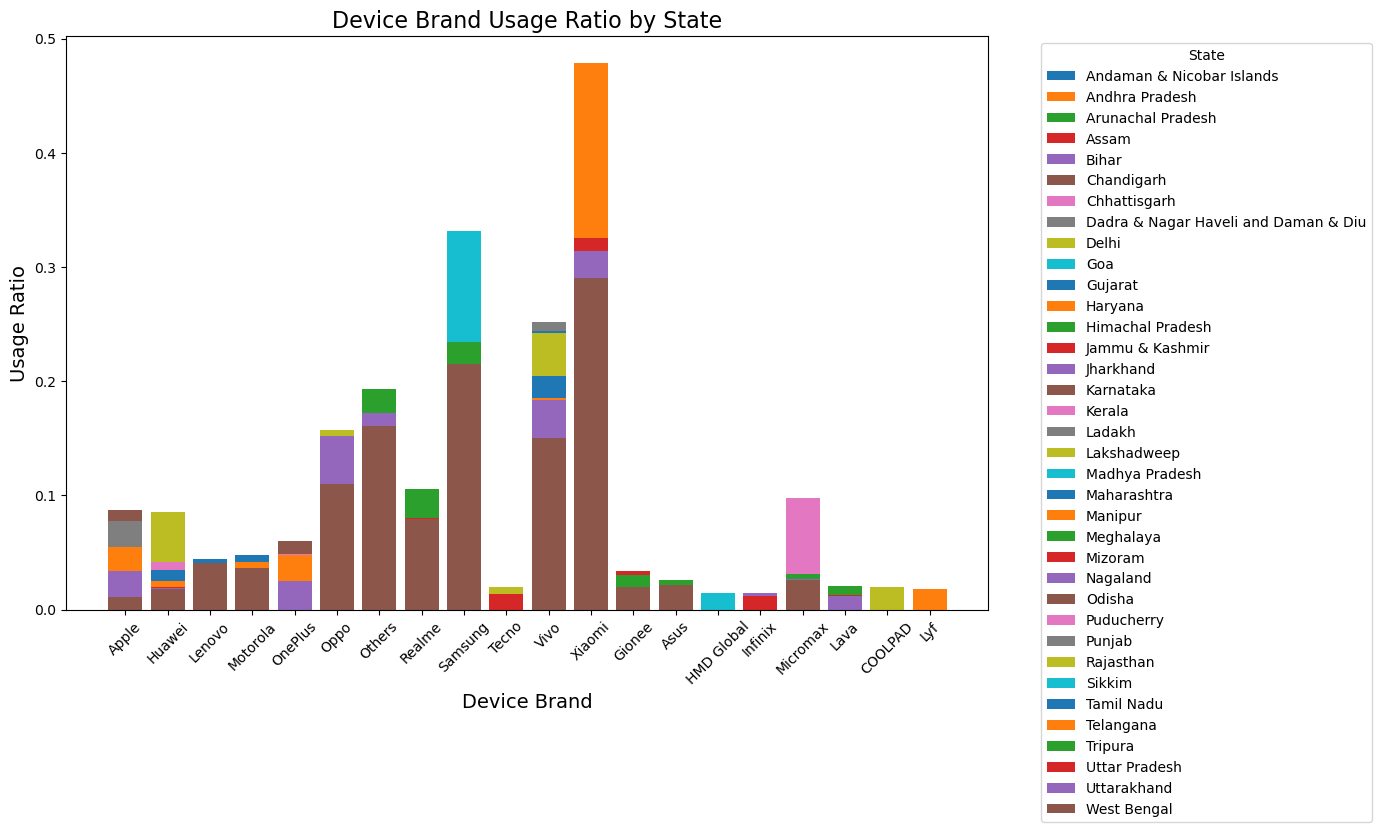

In [106]:
# Task 4.4: Device brand usage ratio
# 1. Merge the State_DeviceData dataset with the State_Txn and Users dataset.
# 2. Calculate the ratio of users using each device brand to the total number of registered users in each state. 
# 3. Create a bar chart depicting the device brand usage ratio for each state.

#  Merge the datasets
merged_data = pd.merge(
    state_device_data,
    state_txn_and_users[['State', 'Year', 'Quarter', 'Registered Users']], 
    on=['State', 'Year', 'Quarter'], 
    how='inner'
)

#  Calculate the device brand usage ratio
merged_data['Usage Ratio'] = merged_data['Registered Users_x'] / merged_data['Registered Users_y']

#  Display results in a tabular format
result = merged_data[['State', 'Year', 'Quarter', 'Brand', 'Usage Ratio']].sort_values(by=['State', 'Brand'])
print(result)

# Create a bar chart for device brand usage ratio for each state
plt.figure(figsize=(14, 8))
for state in result['State'].unique():
    state_data = result[result['State'] == state]
    plt.bar(state_data['Brand'], state_data['Usage Ratio'], label=state)

plt.title('Device Brand Usage Ratio by State', fontsize=16)
plt.xlabel('Device Brand', fontsize=14)
plt.ylabel('Usage Ratio', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Task 5: Data Visualization

C:\Users\Parag\AppData\Local\Temp\ipykernel_9188\1243577998.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Maha_grouped['State-Year-Quarter'], rotation=90, fontsize=10)


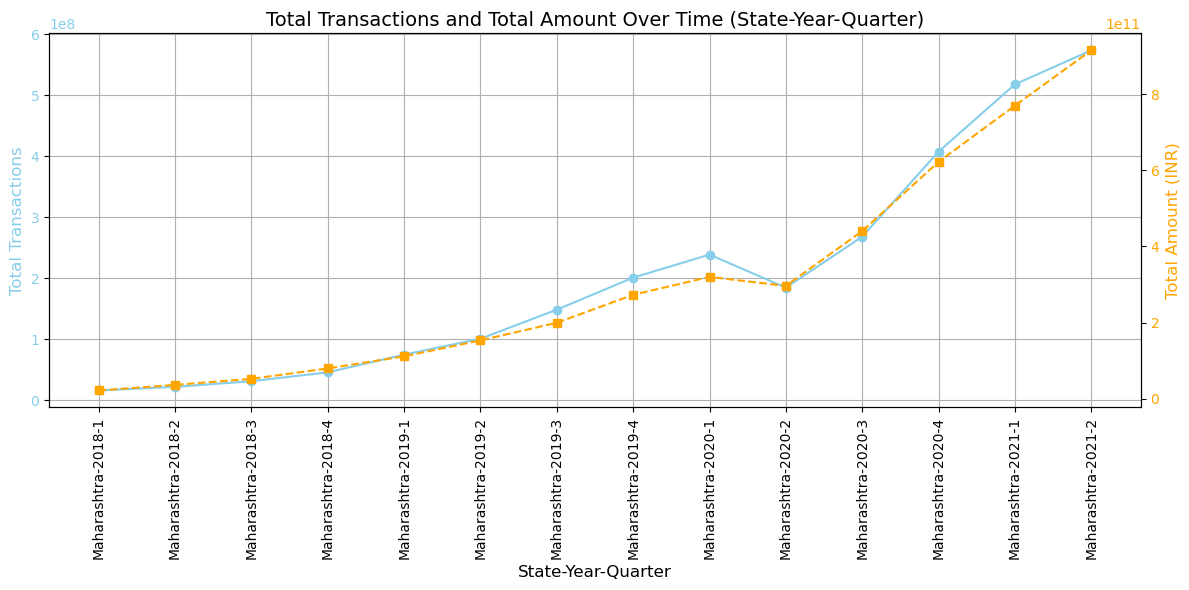

In [108]:
# Task 5.1: Plot the total transactions and amount over time for a selected state
# Create a line plot showing the total number of transactions and the total transaction amount over time (years and quarters) for a selected state. 
# [Hint: you can select any state, maybe your home state or state with max transactions]

# Filter Maharashtra data
Maharashtra = state_txn_and_users[state_txn_and_users['State'] == 'Maharashtra']

# Group by State, Year, Quarter
Maha_grouped = Maharashtra.groupby(['State', 'Year', 'Quarter']).agg(
    Total_Transaction=('Transactions', 'sum'),
    Total_Amount=('Amount (INR)', 'sum')
).reset_index()

# Combine State, Year, Quarter into a single string for the x-axis
Maha_grouped['State-Year-Quarter'] = Maha_grouped[['State', 'Year', 'Quarter']].astype(str).agg('-'.join, axis=1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Transactions (left y-axis)
ax1.plot(
    Maha_grouped['State-Year-Quarter'], 
    Maha_grouped['Total_Transaction'], 
    marker='o', linestyle='-', color='skyblue', label='Total Transactions'
)
ax1.set_xlabel('State-Year-Quarter', fontsize=12)
ax1.set_ylabel('Total Transactions', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(Maha_grouped['State-Year-Quarter'], rotation=90, fontsize=10)
ax1.grid(True)

# Create second y-axis for Total Amount (right y-axis)
ax2 = ax1.twinx()
ax2.plot(
    Maha_grouped['State-Year-Quarter'], 
    Maha_grouped['Total_Amount'], 
    marker='s', linestyle='--', color='orange', label='Total Amount'
)
ax2.set_ylabel('Total Amount (INR)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and layout adjustments
plt.title('Total Transactions and Total Amount Over Time (State-Year-Quarter)', fontsize=14)
fig.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

 

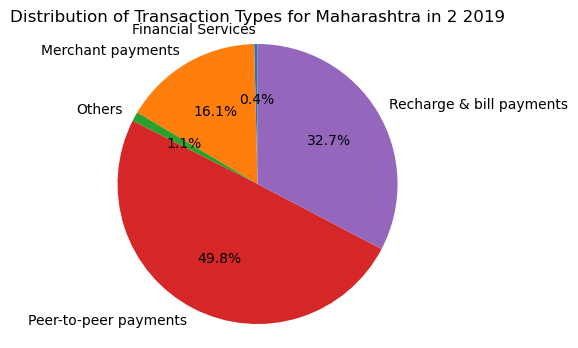

In [110]:
# Task 5.2: Create a pie chart showing the distribution of transaction types for a specific quarter
# 1. Create a pie chart showing the distribution of different transaction types for a selected state and quarter

# Filter data for Maharashtra and a specific quarter (e.g., Q1 of 2024)
state = 'Maharashtra'
quarter = '2'  # Change to the desired quarter
year = 2019      # Change to the desired year

filtered_data = state_txn_split[(state_txn_split['State'] == 'Maharashtra') & 
                                   (state_txn_split['Quarter'] == 1 ) &
                                   (state_txn_split['Year'] == 2019)]

# Group the data by 'Transaction Type' and sum the 'Transactions'
transaction_type_distribution = filtered_data.groupby('Transaction Type')['Transactions'].sum()

# Plotting the pie chart
plt.figure(figsize=(5, 4))
plt.pie(transaction_type_distribution, labels=transaction_type_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of Transaction Types for {state} in {quarter} {year}')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

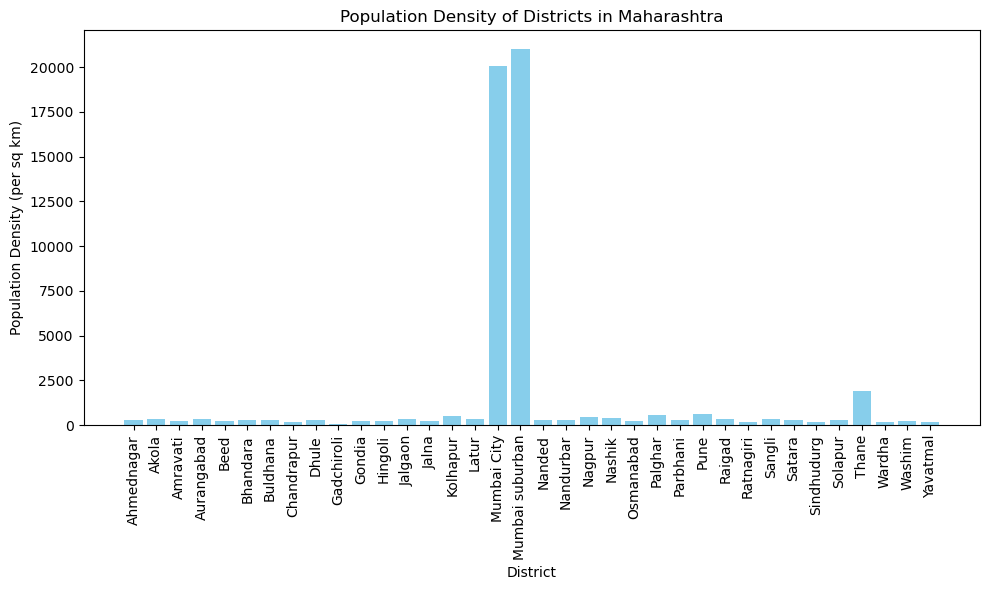

In [111]:
# Task 5.3: Visualize the population density of districts in a selected state
# 1. Create a bar plot showing the population density of districts in a selected state.

# Filter for Maharashtra state
maharashtra_district_data = district_demographics[district_demographics['State'] == 'Maharashtra']

# Plotting Population Density
plt.figure(figsize=(10,6))
plt.bar(maharashtra_district_data['District'], maharashtra_district_data['Density'], color='skyblue')
plt.xlabel('District')
plt.ylabel('Population Density (per sq km)')
plt.title('Population Density of Districts in Maharashtra')
plt.xticks(rotation=90)  # Rotate district names if needed for readability
plt.tight_layout()  # Adjust the layout to avoid overlapping text
plt.show()


## Task 6: Insights and Conclusions [Advanced Section] 

In [113]:
# Task 6.1: Identify any trends or patterns in the transaction data
# Analyze the transaction data to identify any noticeable trends or patterns. Summarize your findings. 
# [hint: you can create line graph – at year or quarter and discuss your findings with interviewer] 

# Ensure the 'Year' and 'Quarter' are of appropriate types
state_txn_and_users['Year'] = state_txn_and_users['Year'].astype(str)
state_txn_and_users['Quarter'] = state_txn_and_users['Quarter'].astype(str)

# Combine Year and Quarter to create a period for plotting
state_txn_and_users['Year_Quarter'] = state_txn_and_users['Year'] + ' - Q' + state_txn_and_users['Quarter']

# printing data with Year_Quarter column showing
state_txn_and_users.head(5)


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,Year_Quarter
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,2018 - Q1
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0,2018 - Q2
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0,2018 - Q3
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0,2018 - Q4
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0,2019 - Q1


Plotting transactions over the years/quarters


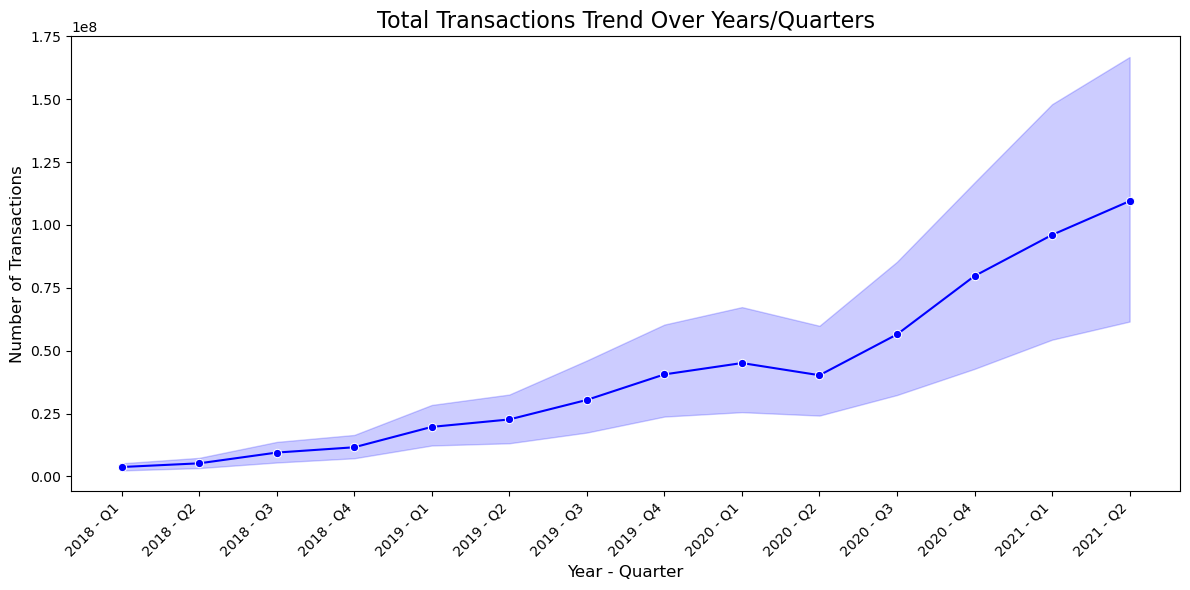

In [116]:
# Plotting transactions over the years/quarters
plt.figure(figsize=(12, 6))

# Create a line plot of total transactions over time (Year_Quarter)
sns.lineplot(data=state_txn_and_users, x='Year_Quarter', y='Transactions', marker='o', color='b')

# Customizing the plot
plt.title('Total Transactions Trend Over Years/Quarters', fontsize=16)
plt.xlabel('Year - Quarter', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
print('Plotting transactions over the years/quarters')
plt.show()


Plotting Amount(INR) over the years/quarters


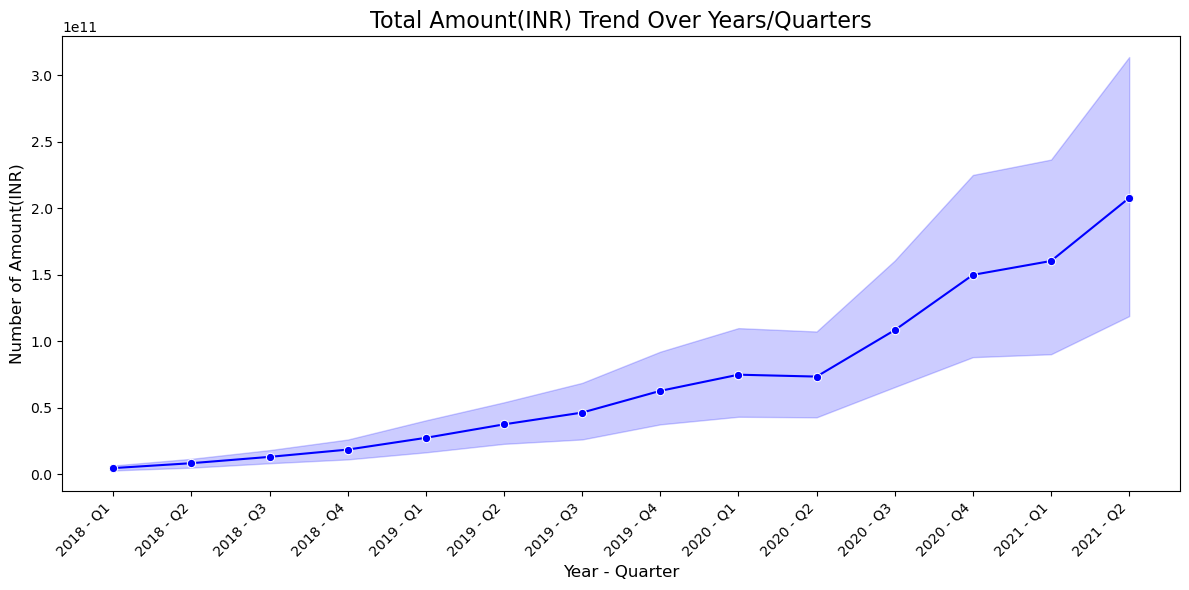

In [117]:
# Plotting amount over the years/quarters
plt.figure(figsize=(12, 6))

# Create a line plot of total transactions over time (Year_Quarter)
sns.lineplot(data=state_txn_and_users, x='Year_Quarter', y='Amount (INR)', marker='o', color='b')

# Customizing the plot
plt.title('Total Amount(INR) Trend Over Years/Quarters', fontsize=16)
plt.xlabel('Year - Quarter', fontsize=12)
plt.ylabel('Number of Amount(INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
print('Plotting Amount(INR) over the years/quarters')
plt.show()


               Density  Transactions
Density       1.000000      0.307704
Transactions  0.307704      1.000000


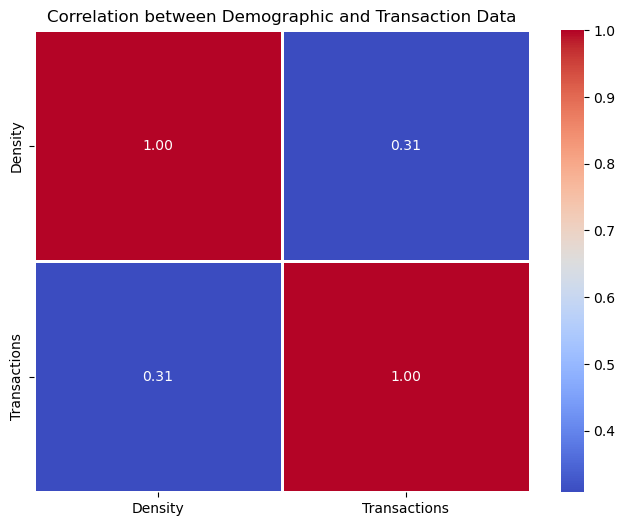

In [118]:
# Task 6.2: Correlate demographic data with transaction data
# 1.	Find correlations between demographic data (e.g., population density) and transaction data (e.g., transaction volume).
# Summarize your findings. [Hint: you can use corr()]

# Merge the datasets on State and District for analysis
merged_data = pd.merge(district_txn_and_users, district_demographics, on=['State', 'District'])

# Select relevant columns for correlation (Population Density and Transactions)
# You can also include other demographic and transaction columns as needed
correlation_data = merged_data[['Density', 'Transactions']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# If you'd like to visualize the correlation as a heatmap:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation between Demographic and Transaction Data')
plt.show()

C:\Users\Parag\AppData\Local\Temp\ipykernel_9188\2220527471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_txn_summary, x='State', y='Transactions', palette='viridis')


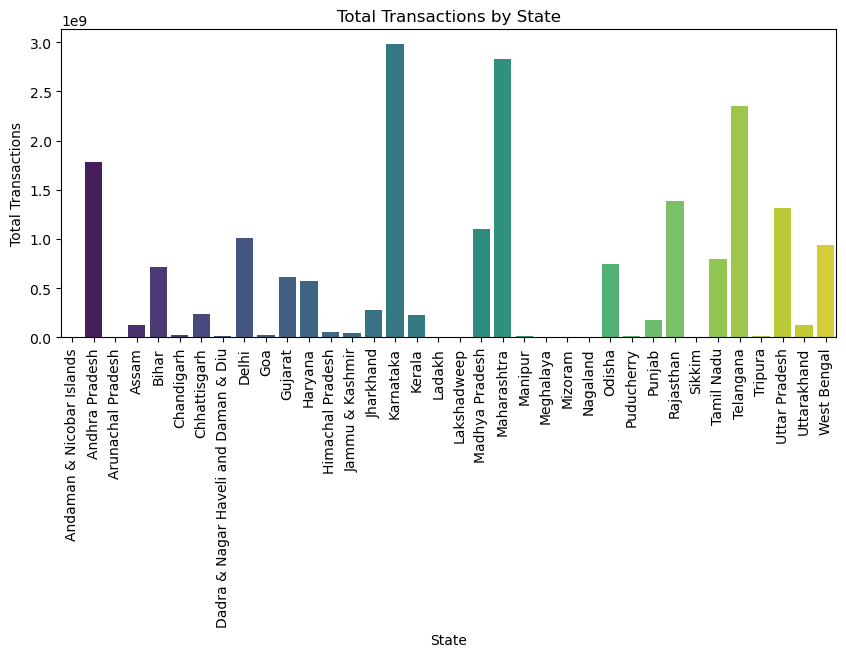

In [119]:
# Task 6.3: Summarize findings and insights
# 1. Summarize the key findings and insights from your analysis. 
# Provide actionable recommendations based on the data.
# [Hint: type and print your recommendations and findings in the notebook. This is open ended] 

# 1 : Summarize total transactions by state
state_txn_summary = state_txn_and_users.groupby('State')['Transactions'].sum().reset_index()

# Plot transactions by state
plt.figure(figsize=(10, 4))
sns.barplot(data=state_txn_summary, x='State', y='Transactions', palette='viridis')
plt.title('Total Transactions by State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Transactions')
plt.show()


C:\Users\Parag\AppData\Local\Temp\ipykernel_9188\2229417375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states_atv, x='State', y='ATV (INR)', palette='Blues')


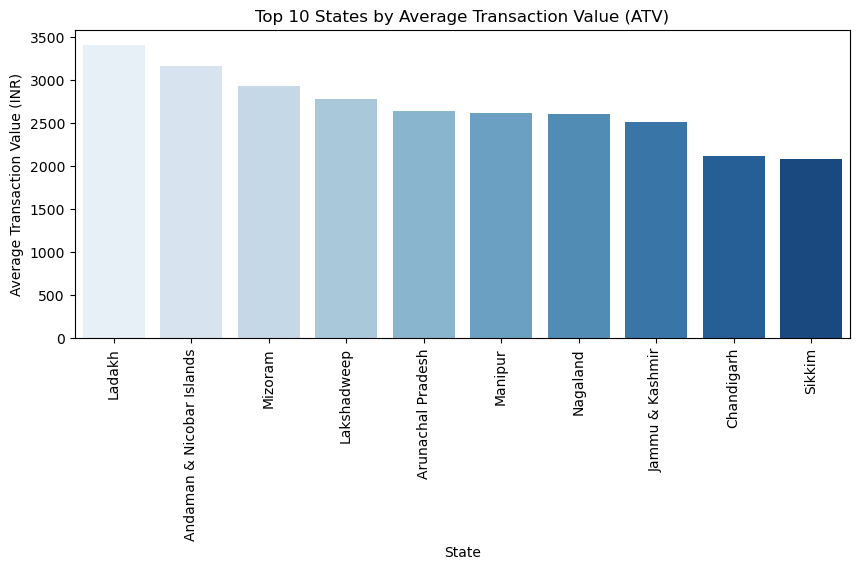

In [120]:
# 2 : Find top states with highest Average Transaction Value (ATV)
top_states_atv = state_txn_and_users.groupby('State')['ATV (INR)'].mean().reset_index().sort_values(by='ATV (INR)', ascending=False).head(10)

# Plot top 10 states by ATV
plt.figure(figsize=(10, 4))
sns.barplot(data=top_states_atv, x='State', y='ATV (INR)', palette='Blues')
plt.title('Top 10 States by Average Transaction Value (ATV)')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Transaction Value (INR)')
plt.show()

C:\Users\Parag\AppData\Local\Temp\ipykernel_9188\2099583240.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_usage, x='Brand', y='Percentage', palette='muted')


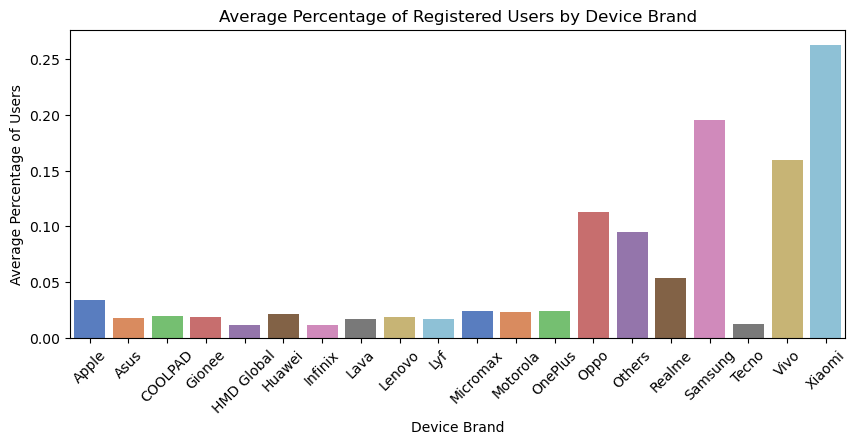

In [121]:
# 3 : Analyzing device brand usage across states
device_usage = state_device_data.groupby('Brand')['Percentage'].mean().reset_index()

# Plot brand usage across states
plt.figure(figsize=(10, 4))
sns.barplot(data=device_usage, x='Brand', y='Percentage', palette='muted')
plt.title('Average Percentage of Registered Users by Device Brand')
plt.xticks(rotation=45)
plt.xlabel('Device Brand')
plt.ylabel('Average Percentage of Users')
plt.show()

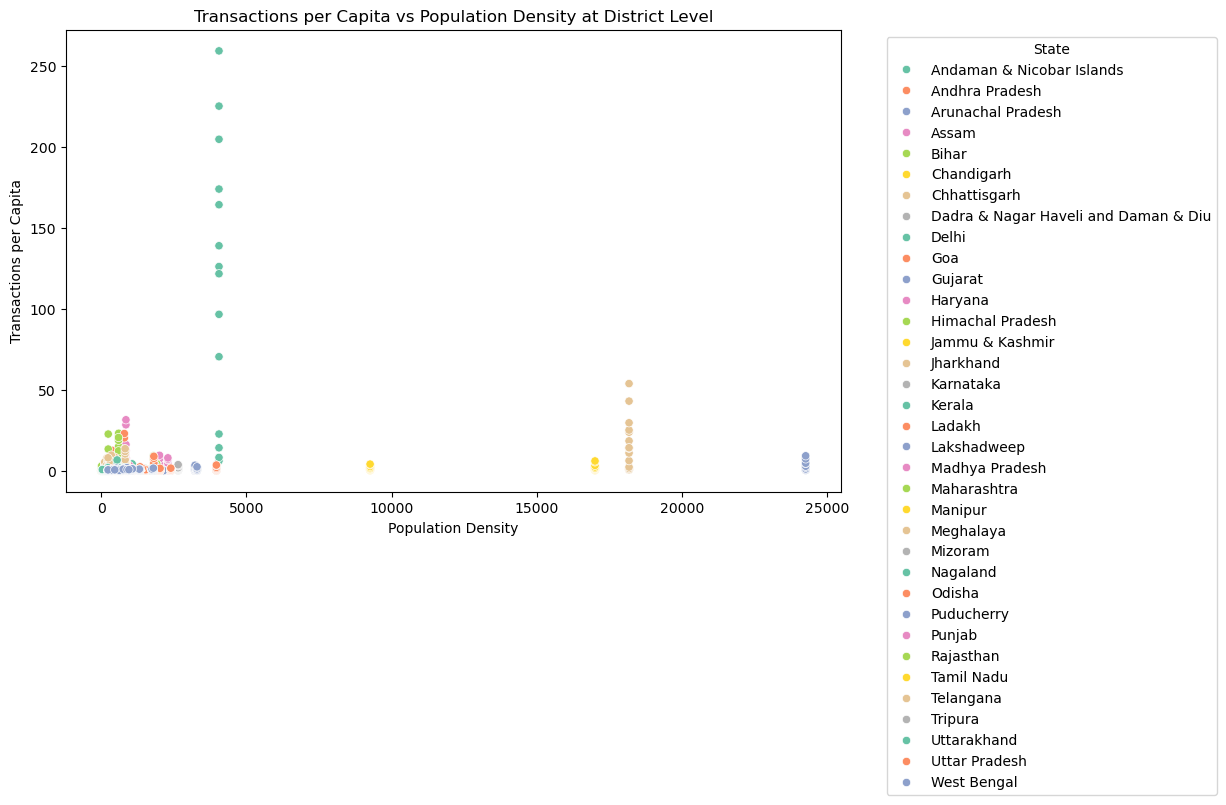

In [122]:
# 4 : Correlation between population and transactions at district level
district_data = pd.merge(district_txn_and_users, district_demographics, on=['State', 'District'])
district_data['Transactions per Capita'] = district_data['Transactions'] / district_data['Population']

# Scatter plot of Transactions per Capita vs Population Density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=district_data, x='Density', y='Transactions per Capita', hue='State', palette='Set2')
plt.title('Transactions per Capita vs Population Density at District Level')
plt.xlabel('Population Density')
plt.ylabel('Transactions per Capita')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [123]:
# Insights and recommendations
insights = """
1. The states with the highest total transactions can be prioritized for marketing and engagement strategies.
2. The states with higher Average Transaction Value (ATV) show a potential for targeting premium users with special offers.
3. Certain device brands dominate the registered users' demographic; these brands can be targeted for specific campaigns.
4. Districts with high population density tend to have higher transactions per capita; these districts should focus on increasing user engagement.
5. The relationship between population density and transactions can be used to identify regions for future growth.
"""

print("Key Insights and Actionable Recommendations:")
print(insights)

Key Insights and Actionable Recommendations:

1. The states with the highest total transactions can be prioritized for marketing and engagement strategies.
2. The states with higher Average Transaction Value (ATV) show a potential for targeting premium users with special offers.
3. Certain device brands dominate the registered users' demographic; these brands can be targeted for specific campaigns.
4. Districts with high population density tend to have higher transactions per capita; these districts should focus on increasing user engagement.
5. The relationship between population density and transactions can be used to identify regions for future growth.



In [124]:
# Task 6.4: Perform a complex analysis to identify key factors affecting transaction volume
# 1.	Use multiple datasets to identify key factors that significantly affect transaction volume.
# 2.	Perform a multivariate analysis to determine the impact of different variables on transaction volume.
# 3.	Create a comprehensive report detailing the findings, including visualizations and interpretations.
# [Hint: import statsmodels.api as sm]


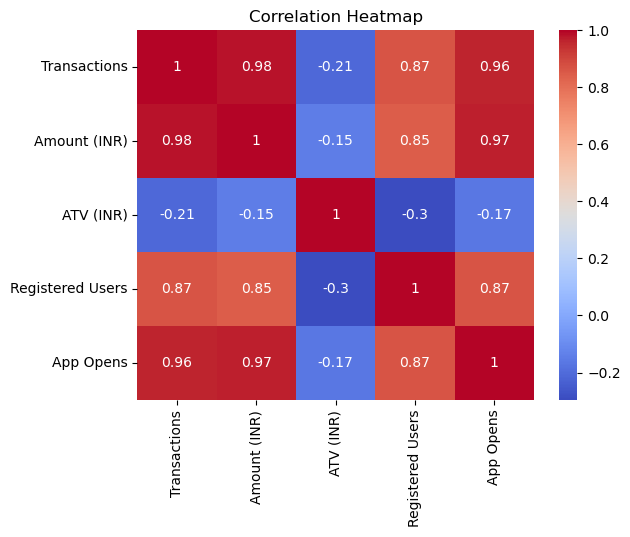

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = state_txn_and_users.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [126]:
import statsmodels.api as sm

# Selecting independent variables
X = state_txn_and_users[['Registered Users', 'App Opens', 'ATV (INR)']]
y = state_txn_and_users['Transactions']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Transactions   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     2243.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          1.67e-289
Time:                        11:43:22   Log-Likelihood:                -9227.3
No. Observations:                 504   AIC:                         1.846e+04
Df Residuals:                     500   BIC:                         1.848e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.373e+06   3.85e+06  

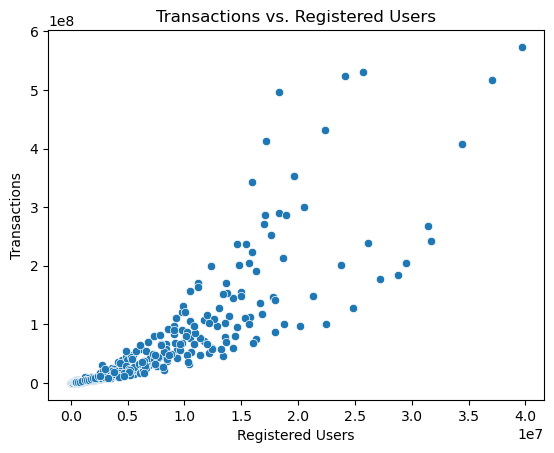

In [127]:
sns.scatterplot(x='Registered Users', y='Transactions', data=state_txn_and_users)
plt.title("Transactions vs. Registered Users")
plt.show()
